In [1]:
from datasets import load_dataset
import pandas as pd

# https://huggingface.co/datasets/jainr3/diffusiondb-pixelart
ds = load_dataset("jainr3/diffusiondb-pixelart", "2k_random_1k")

In [2]:
train = ds['train']
df = pd.DataFrame(train)
df.head(3)

,image,text
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"doom eternal, game concept art, veins and worm..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,a beautiful photorealistic painting of cemeter...
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"doom eternal, evangelion, game concept art, ve..."


In [3]:
# Check column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   1000 non-null   object
 1   text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


In [4]:
from PIL import Image

def scale_image(image: Image.Image, factor: float) -> Image.Image | None:
    """Scales a PIL Image down by a factor and returns a new PIL Image.

    Args:
        image: The PIL Image to scale.
        factor: The scaling factor (e.g., 0.5 for half the size).

    Returns:
        A new PIL Image scaled down by the factor, or None if an error occurs.
    """
    try:
        width, height = image.size
        new_width = int(width * factor)
        new_height = int(height * factor)
        scaled_image = image.resize((new_width, new_height), resample=Image.Resampling.NEAREST)
        return scaled_image
    except Exception as e:
        print(f"Error scaling image: {e}")
        return None

In [5]:
from IPython.display import display
import ipywidgets as widgets

def show_image(index):
    image = df['image'][index]
    scale = 1/3
    scaled_img = scale_image(image, scale)
    display(scaled_img)
    print(df['text'][index])

image_slider = widgets.IntSlider(
    min=0,
    max=len(df) - 1,
    step=1,
    description='Image Index:',
    value=0
)

widgets.interactive(show_image, index=image_slider)

interactive(children=(IntSlider(value=0, description='Image Index:', max=999), Output()), _dom_classes=('widge…

In [6]:
from matplotlib import pyplot as plt

def viz_compare_images(img1: Image.Image, img2: Image.Image):
    _, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')
    axes[1].imshow(img2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()


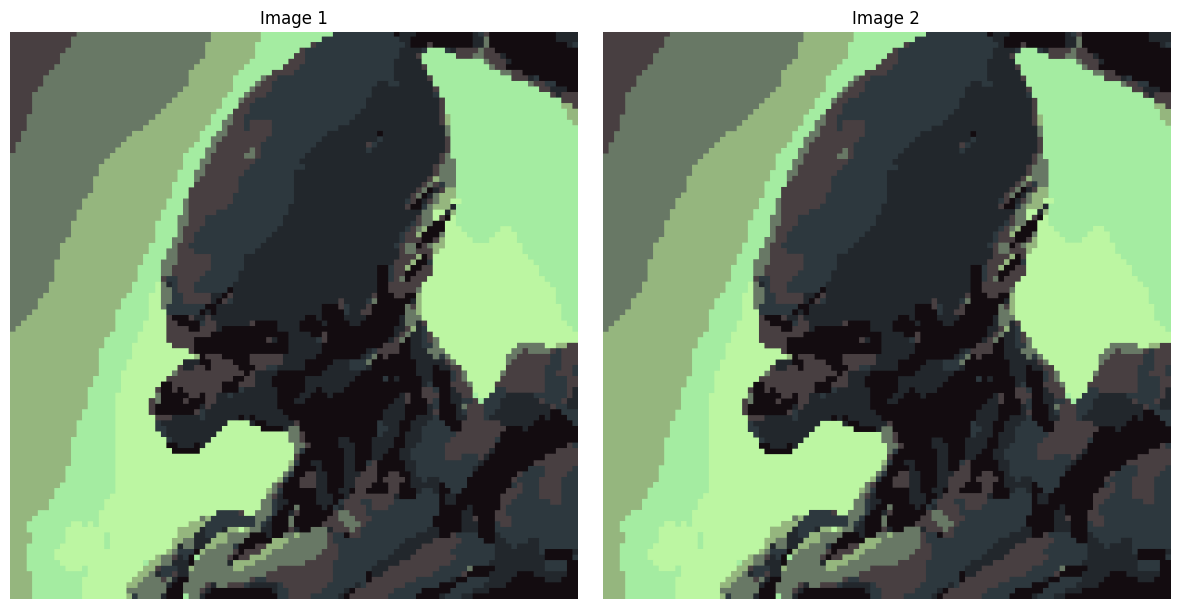

original image and scaled back up image are equal? False
scaled down 1 and scaled down 2 are equal? True
scaled back up 1 and scaled back up 2 are equal? True


In [7]:
# play with image scaling
scale = 5

img: Image.Image = df['image'][2]
# print('original image')
# display(img)
scaled_down_1 = scale_image(img, 1/scale)
# print('scaled down')
# display(scaled_down_1)
scaled_back_up_1 = scale_image(scaled_down_1, scale)
# print('scaled back up')
# display(scaled_back_up_1)
scaled_down_2 = scale_image(img, 1/scale)
# print('scaled down 2')
# display(scaled_down_2)
scaled_back_up_2 = scale_image(scaled_down_2, scale)
# print('scaled back up 2')
# display(scaled_back_up_2)

viz_compare_images(img, scaled_back_up_2)

is_equal = img.tobytes() == scaled_back_up_2.tobytes()
print(f'original image and scaled back up image are equal? {is_equal}')

is_equal = scaled_down_1.tobytes() == scaled_down_2.tobytes()
print(f'scaled down 1 and scaled down 2 are equal? {is_equal}')

is_equal = scaled_back_up_1.tobytes() == scaled_back_up_2.tobytes()
print(f'scaled back up 1 and scaled back up 2 are equal? {is_equal}')


In [8]:
from tqdm import tqdm

df_sample = df.sample(40)

def analyze_image_quality(scale: int) -> bool:
    n_good = 0
    n_bad = 0
    for _, item in tqdm(df_sample.iterrows()):
        image: Image.Image = item['image']
        scaled_down_image = scale_image(image, 1/scale)
        scaled_back_up_image = scale_image(scaled_down_image, scale)
        scaled_down_image = scale_image(image, 1/scale)
        scaled_back_up_image_2 = scale_image(scaled_down_image, scale)
        if image.tobytes() == scaled_back_up_image_2.tobytes():
            n_good += 1
        else:
            n_bad += 1
    print(f"n_good: {n_good}")
    print(f"n_bad: {n_bad}")

image_slider = widgets.IntSlider(
    min=1,
    max=100,
    step=1,
    description='Scale:',
    value=1
)

widgets.interactive(analyze_image_quality, scale=image_slider)

interactive(children=(IntSlider(value=1, description='Scale:', min=1), Output()), _dom_classes=('widget-intera…

In [9]:
# Takeaways
# - The images are not pixelart for games. They are pixel-ified photos. 
#      Therefor, low quality for a games use case.
# - The pixel sizes for all images are the same: 5x5
# - Therefor to get images at 1x1px, we need to scale down by 5x

## Takeaways
- The images are not pixelart for games. They are pixel-ified photos. Therefore, low quality for a games use case.
- The pixel sizes for all images are the same: 5x5
- Therefore to get images at 1x1px, we need to scale down by 5x